In [1]:
# Imports
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50, EfficientNetB0
#from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np


In [2]:
# Plots Loss and accuracy of the train veresus the validation data
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [3]:
# Initialize a CNN model, reached 87% accuracy

def initialize_cnn0_model():
    '''instanciate and return the CNN architecture'''
    model = models.Sequential()

    model.add(layers.Conv2D(8, kernel_size=(6, 6), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [93]:
def initialize_cnn1_model():
    '''instanciate and return the CNN architecture'''
    model = models.Sequential()

    model.add(layers.Conv2D(8, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [94]:
def initialize_cnn2_model():
    '''instanciate and return the CNN architecture'''
    model = models.Sequential()

    model.add(layers.Conv2D(8, kernel_size=(10, 10), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [7]:
# Compile the model as a binary classification model

def compile_model(model):
    '''return a compiled model for the baseline'''
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

# Test different dataset


In [77]:
# Load images from a folder


diseases = ['beau_s line', 'black line', 'clubbing', 'mees_ line', 'onycholysis', 'terry_s nail', 'white spot']

# Load the healthy nails == 0
h_path = os.path.join(os.path.expanduser('~'), "code", "ariannamng",
                               "predicting_nail_diseases", 'raw_data', 'Nail', 'normal')
X_d = []
y_d = []
X = []
y = []
for f in os.listdir(h_path):
        img = Image.open(os.path.join(h_path, f))
        foo = img.resize((256,256))
        X.append(np.array(foo))
        y.append(0)


# Load the diseased nails == 1
for disease in diseases:
    d_path = os.path.join(os.path.expanduser('~'), "code", "ariannamng",
                                   "predicting_nail_diseases", 'raw_data', 'Nail', disease)

    for f in os.listdir(d_path):
            img = Image.open(os.path.join(d_path, f))
            foo = img.resize((256,256))
            X_d.append(np.array(foo))
            y_d.append(1)


c = list(zip(X_d, y_d))
np.random.shuffle(c)
X_d, y_d = zip(*c)

X = X + list(X_d[:len(X)])
y = y + list(y_d[:len(y)])

d = list(zip(X, y))
np.random.shuffle(d)
X, y = zip(*d)
X = np.array(X)
y = np.array(y)

In [78]:
X.shape

(120, 256, 256, 3)

In [79]:
# split data in test and train and preprocess data
ratio = int(120*0.8)

X_train_processed = X[:ratio]/ 255.
X_test_processed = X[ratio:120]/ 255.

y_train = y[:ratio]
y_test = y[ratio:120]

In [80]:
X_train_processed.shape

(96, 256, 256, 3)

In [81]:
y_train.sum()

52

In [82]:
y_test.shape

(24,)

# CNN baseline model

In [95]:
# Fit the CNN model on the train data
es = EarlyStopping(patience = 10)
cnn_model = compile_model(initialize_cnn1_model())

history_cnn = cnn_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 16,
  verbose = 1,
  callbacks = [es]
)

Epoch 1/500
5/5 [==============================] - 1s 129ms/step - loss: 0.7100 - accuracy: 0.5263 - val_loss: 0.6370 - val_accuracy: 0.7000
Epoch 2/500
5/5 [==============================] - 1s 110ms/step - loss: 0.7084 - accuracy: 0.4868 - val_loss: 0.7146 - val_accuracy: 0.3000
Epoch 3/500
5/5 [==============================] - 1s 110ms/step - loss: 0.6751 - accuracy: 0.5789 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 4/500
5/5 [==============================] - 1s 110ms/step - loss: 0.6529 - accuracy: 0.7105 - val_loss: 0.6647 - val_accuracy: 0.7500
Epoch 5/500
5/5 [==============================] - 1s 111ms/step - loss: 0.6062 - accuracy: 0.6842 - val_loss: 0.7675 - val_accuracy: 0.4500
Epoch 6/500
5/5 [==============================] - 1s 110ms/step - loss: 0.5246 - accuracy: 0.7368 - val_loss: 1.0610 - val_accuracy: 0.4000
Epoch 7/500
5/5 [==============================] - 1s 111ms/step - loss: 0.5215 - accuracy: 0.7500 - val_loss: 0.6783 - val_accuracy: 0.5500
Epoch 8/500
5

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

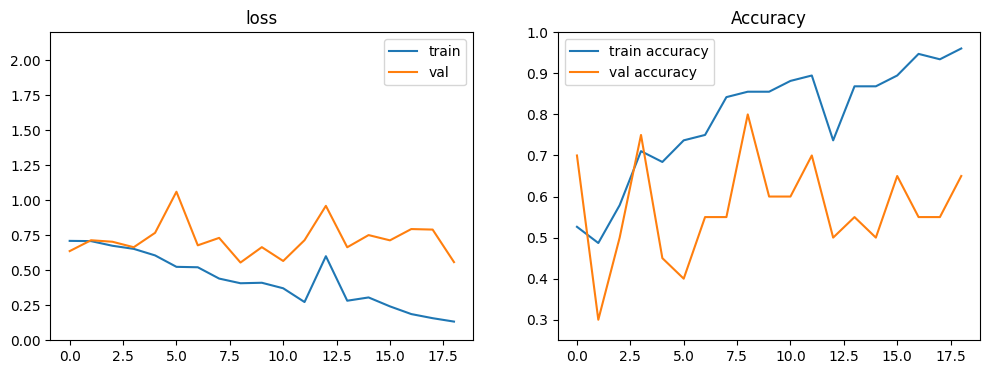

In [96]:
# Plot Loss and accuracy of the basline model

plot_history(history_cnn, title='Baseline', axs=None, exp_name="")

In [86]:
cnn_model.predict(X_train_processed)

3/3 [==============================] - 0s 54ms/step


array([[2.3039621e-04],
       [5.6415019e-03],
       [2.8965110e-03],
       [9.5222652e-01],
       [9.9918675e-01],
       [9.9816293e-01],
       [2.3549535e-06],
       [9.3112922e-01],
       [5.1656212e-03],
       [2.7806063e-05],
       [2.2451421e-02],
       [4.1108731e-05],
       [9.9999326e-01],
       [9.9230713e-01],
       [9.9563974e-01],
       [9.9733710e-01],
       [2.2763736e-05],
       [9.9582136e-01],
       [2.7046062e-04],
       [3.2055765e-02],
       [4.3042147e-04],
       [4.5415000e-03],
       [9.9994075e-01],
       [9.9352908e-01],
       [4.4480693e-03],
       [9.9999881e-01],
       [9.6298653e-01],
       [9.8009026e-01],
       [9.9999952e-01],
       [1.1106751e-02],
       [1.6189897e-03],
       [9.9696302e-01],
       [9.9893522e-01],
       [3.3535555e-03],
       [9.9979252e-01],
       [9.9763167e-01],
       [8.7008590e-04],
       [5.9985620e-04],
       [9.9995917e-01],
       [9.4168687e-01],
       [5.1766033e-03],
       [4.144084

In [25]:
# Evaluate the baseline model using the test data
cnn_model.evaluate(X_test_processed, y_test, verbose=0)

[0.6232308149337769, 0.8671875]

# TRANSFER LEARNING

In [ ]:
# Initialize and compile a model for a transfer learning

def build_model(base_model):
      '''instanciate and return the CNN architecture'''
      base_model = set_nontrainable_layers(base_model)
      flattening_layer = layers.Flatten()
      dense_layer = layers.Dense(500, activation='relu')
      prediction_layer = layers.Dense(1, activation='sigmoid')

      model = Sequential([
      base_model,
      flattening_layer,
      dense_layer,
      prediction_layer
      ])
      return compile_model(model)

In [ ]:
# Set the first layers to be untrainable

def set_nontrainable_layers(model):
    model.trainable = False
    return model

# VGG16 model

In [35]:
# Loads the VGG16 model
def load_VGG16_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [36]:
# Fit the VGG16 model on the train data
es = EarlyStopping(patience = 10)
VGG16_model = build_model(load_VGG16_model())

history_VGG16 = VGG16_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 32,
  verbose = 0,
  callbacks = [es]
)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

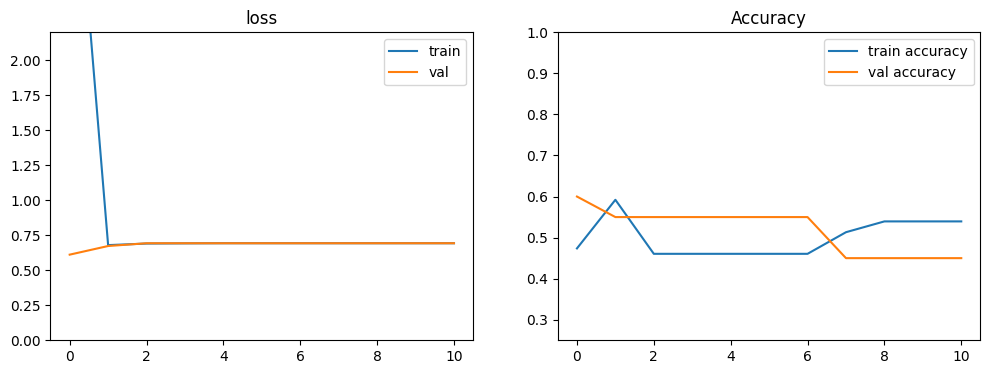

In [37]:
# Plot Loss and accuracy of the VGG16 model
plot_history(history_VGG16, title='VGG16', axs=None, exp_name="")

In [38]:
# Evaluate the VGG16 model using the test data
VGG16_model.evaluate(X_test_processed, y_test, verbose=0)

[0.6933618187904358, 0.4166666567325592]

# ResNet50

In [39]:
# Loads the ResNet50 model
def load_ResNet50_model():
    model = ResNet50(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [40]:
# Fit the ResNet50 model on the train data
es = EarlyStopping(patience = 10)
ResNet50_model = build_model(load_ResNet50_model())

history_ResNet50 = ResNet50_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 32,
  verbose = 0,
  callbacks = [es]
)

94765736/94765736 [==============================] - 3s 0us/step


(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

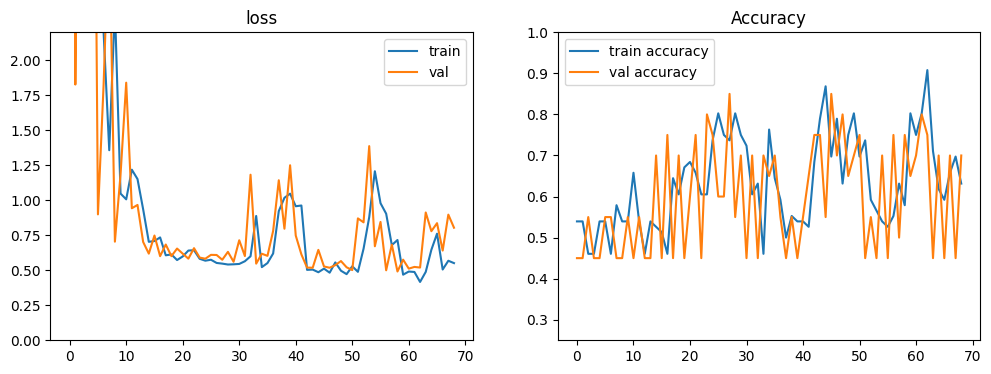

In [41]:
# Plot Loss and accuracy of the ResNet50 model
plot_history(history_ResNet50, title='ResNet50', axs=None, exp_name="")

In [42]:
# Evaluate the ResNet50 model using the test data
ResNet50_model.evaluate(X_test_processed, y_test, verbose=0)

[0.7244213223457336, 0.5833333134651184]

# EfficientNetB0

In [ ]:
# Loads the EfficientNetB0 model
def load_EfficientNetB0_model():
    model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=X_train_processed.shape[1:4])
    return model

In [ ]:
# Fit the EfficientNetB0 model on the train data
es = EarlyStopping(patience = 10)
EfficientNetB0_model = build_model(load_EfficientNetB0_model())

history_EfficientNetB0 = EfficientNetB0_model.fit(
  X_train_processed,
  y_train,
  validation_split = 0.2,
  epochs = 500,
  batch_size = 32,
  verbose = 1,
  callbacks = [es]
)

In [ ]:
# Plot Loss and accuracy of the EfficientNetB0 model
plot_history(history_EfficientNetB0, title='EfficientNetB0', axs=None, exp_name="")

In [ ]:
# Evaluate the EfficientNetB0 model using the test data
EfficientNetB0_model.evaluate(X_test_processed, y_test, verbose=0)

# Data augmentation

In [ ]:
# Add Data Augmentation if your model is overfitting
datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.),
    zoom_range = (0.3, 1.5))


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_processed)

model_data_aug = build_model()

train_flow = datagen.flow(X_train_processed, y_train, batch_size=16)
val_flow = datagen.flow(X_val_preprocessed, y_val, batch_size=16)

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history_data_aug = model_data_aug.fit(train_flow,
                                      validation_data = val_flow,
                                      epochs = 50,
                                      callbacks = [es])